In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('spam (1).csv')

In [104]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1324,ham,Can you call me plz. Your number shows out of ...,NaN,NaN,NaN
3170,ham,Still otside le..u come 2morrow maga..,NaN,NaN,NaN
3659,ham,I will reach ur home in &lt;#&gt; minutes,NaN,NaN,NaN
3359,ham,Please attend the phone:),NaN,NaN,NaN
1116,ham,Hey... What time is your driving on fri? We go...,NaN,NaN,NaN


In [105]:
df.shape

(5572, 5)

In [106]:
# Data Cleaning
# EDA
# Text Preprocessing
# Model Building
# Evalution
# improvements
# website
#deploy

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# Data Cleaning

In [108]:

# drop last 3 columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace =True)

In [109]:
df.sample(5)

,v1,v2
1770,ham,Dont show yourself. How far. Put new pictures ...
4520,ham,Hi good mornin.. Thanku wish u d same..
3115,ham,Uncle Abbey! Happy New Year. Abiola
3172,spam,"Dear Voucher Holder, To claim this weeks offer..."
4452,ham,Or I guess &lt;#&gt; min


In [110]:
# Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [111]:
df.sample(5)

,target,text
2002,spam,TheMob>Yo yo yo-Here comes a new selection of ...
4522,ham,Actually I decided I was too hungry so I haven...
522,ham,Were gonna go get some tacos
2668,spam,Wanna get laid 2nite? Want real Dogging locati...
4754,ham,U wan 2 haf lunch i'm in da canteen now.


In [112]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [113]:

df['target']=encoder.fit_transform(df['target'])

In [114]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [115]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [116]:
#check fro duplicate values
df.duplicated().sum()


403

In [117]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [118]:
df.duplicated().sum()

0

In [119]:
df.shape

(5169, 2)

# 2.EDA(Exploratory Data Analysis)

In [120]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [121]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

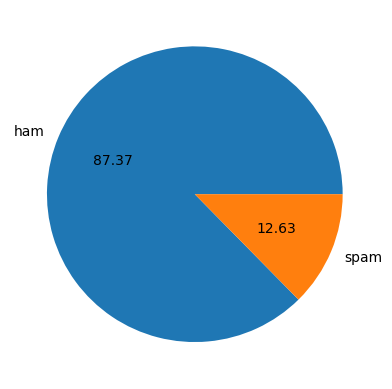

In [122]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [123]:
# Data is imbalanced

In [124]:
 import nltk

In [125]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91955\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [126]:
import numpy as np
import pandas as pd

In [127]:
  df['num_characters']=df['text'].apply(len)

In [128]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [129]:
#numbers of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [130]:
df.head()


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [131]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [132]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [133]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [134]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [135]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [136]:
import seaborn as sns

# Data Preprocessing
1-Lower Cases
2-Tokenization
3-Removing special characters
4-Removing step words and punctuation
5-Stemming

In [137]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [138]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [139]:
import string
import nltk
nltk.download('stopwords')
string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91955\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [140]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [141]:
df['transformed_text']=df['text'].apply(transform_text)

In [142]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [143]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [144]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

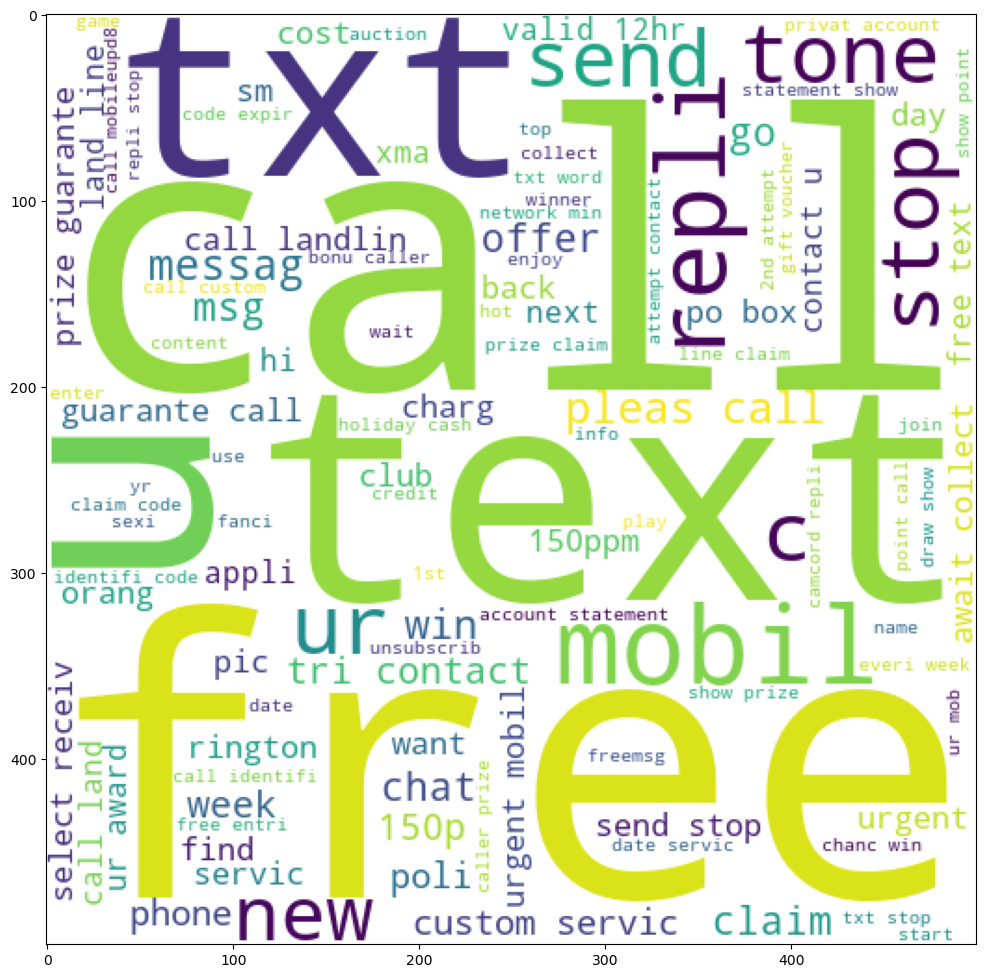

In [145]:
plt.figure(figsize=(12,15))
plt.imshow(spam_wc)

In [146]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

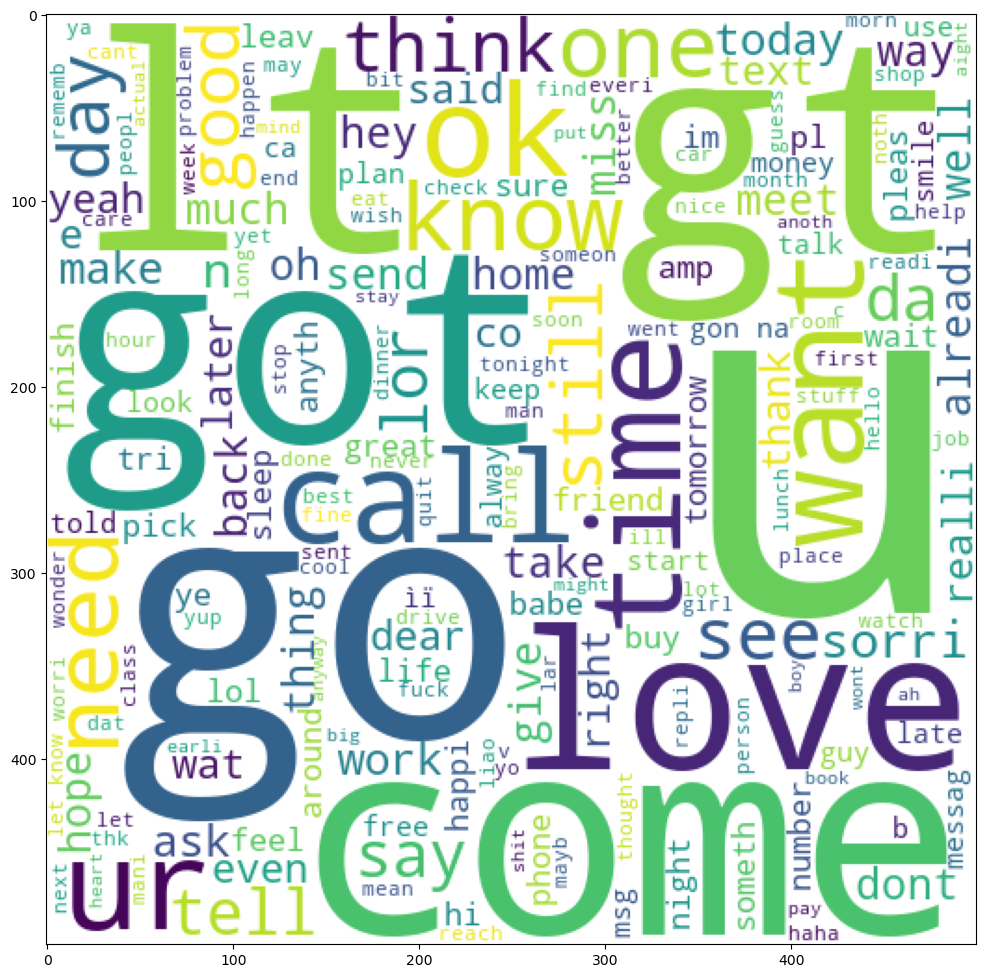

In [147]:
plt.figure(figsize=(12,15))
plt.imshow(ham_wc)

In [148]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [152]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [153]:
len(spam_corpus)

9939

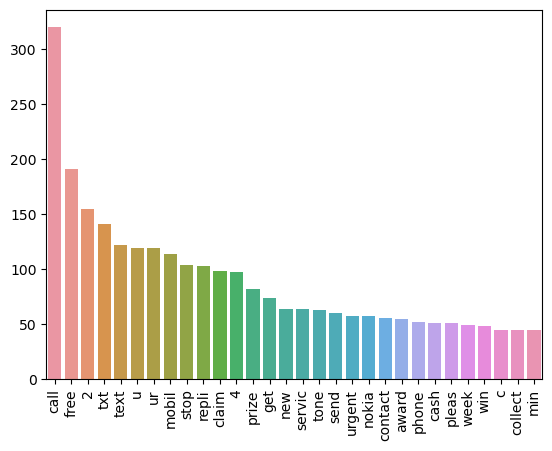

In [155]:
spam_counter = Counter(spam_corpus)
most_common_words = spam_counter.most_common(30)

# Create a bar plot
sns.barplot(x=[word for word, count in most_common_words], y=[count for word, count in most_common_words])
plt.xticks(rotation='vertical')
plt.show()

In [156]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [157]:
len(ham_corpus)

35394

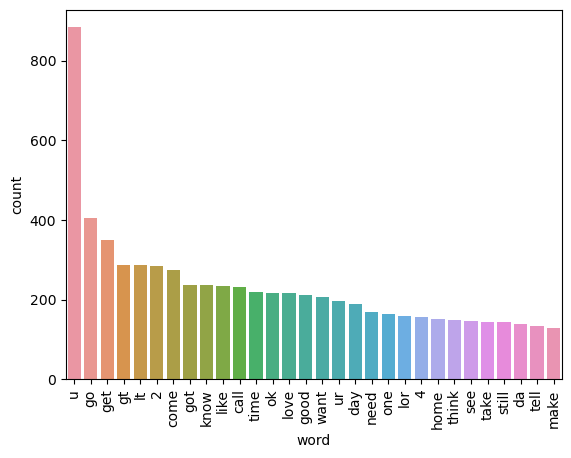

In [159]:
ham_counter = Counter(ham_corpus)
most_common_words = ham_counter.most_common(30)

# Create a DataFrame with named columns
df_most_common = pd.DataFrame(most_common_words, columns=['word', 'count'])

# Create a bar plot
sns.barplot(x='word', y='count', data=df_most_common)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [160]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)
cv=CountVectorizer()

In [161]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [162]:
X.shape

(5169, 3000)

In [163]:
y=df['target'].values

In [164]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [167]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [168]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [169]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [170]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [171]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
# tfidf  --->  mnb

In [ ]:
# improve model
# 1- change the max_features parameter of tfidf

In [172]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))